In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_before = 'edata_2min_agg_before.csv'
file_after = 'edata_2min_agg_after.csv'

In [3]:
df1= pd.read_csv(file_before, sep=";")
df2= pd.read_csv(file_after, sep=";")

print(df1.shape)
print(df2.shape)

(4852, 19)
(3772, 19)


In [4]:

huan= ["331159366#1","331159366#2","331159366#3","331159366#4","331159366#5" ,"331159366#6","331159366#7","331159366#8"]
dong = ["331159364#2.1476" , "331159364#2.526"]
nan = ["826105809#14","826105809#14.186","826105809#14.238"]
xi = ["331158296#2","331158296#2.100","331158296#2.118"]
bei = ["897570587", "897570587.118", "897570589"]

edges =dict(
    huan= ["331159366#1","331159366#2","331159366#3","331159366#4","331159366#5" ,"331159366#6","331159366#7","331159366#8"],
    dong = ["331159364#2.1476" , "331159364#2.526"],
    nan = ["826105809#14","826105809#14.186","826105809#14.238"],
    xi = ["331158296#2","331158296#2.100","331158296#2.118"],
    bei = ["897570587", "897570587.118", "897570589"]
    )

len(edges)

5

In [5]:
edges["dong"]

['331159364#2.1476', '331159364#2.526']

# 小流程测试

In [42]:
data_after = pd.read_csv(file_before, sep=";")

In [43]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interval_begin          4852 non-null   float64
 1   interval_end            4852 non-null   float64
 2   interval_id             4852 non-null   object 
 3   edge_arrived            4852 non-null   int64  
 4   edge_density            4852 non-null   float64
 5   edge_departed           4852 non-null   int64  
 6   edge_entered            4852 non-null   int64  
 7   edge_id                 4852 non-null   object 
 8   edge_laneChangedFrom    4852 non-null   int64  
 9   edge_laneChangedTo      4852 non-null   int64  
 10  edge_laneDensity        4852 non-null   float64
 11  edge_left               4852 non-null   int64  
 12  edge_occupancy          4852 non-null   float64
 13  edge_overlapTraveltime  4852 non-null   float64
 14  edge_sampledSeconds     4852 non-null   

In [45]:
data_after.shape

(4852, 19)

In [46]:
data_af = data_after.drop(labels=["interval_id"], axis=1, inplace= False)
data_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interval_begin          4852 non-null   float64
 1   interval_end            4852 non-null   float64
 2   edge_arrived            4852 non-null   int64  
 3   edge_density            4852 non-null   float64
 4   edge_departed           4852 non-null   int64  
 5   edge_entered            4852 non-null   int64  
 6   edge_id                 4852 non-null   object 
 7   edge_laneChangedFrom    4852 non-null   int64  
 8   edge_laneChangedTo      4852 non-null   int64  
 9   edge_laneDensity        4852 non-null   float64
 10  edge_left               4852 non-null   int64  
 11  edge_occupancy          4852 non-null   float64
 12  edge_overlapTraveltime  4852 non-null   float64
 13  edge_sampledSeconds     4852 non-null   float64
 14  edge_speed              4852 non-null   

In [47]:
edge_id = data_af["edge_id"]

for ege in xi:
    print(ege in edge_id.values) 


True
True
True


In [61]:
# 如果要选择某列等于多个数值或者字符串时，要用到.isin(), 我们把df修改了一下：
# 东方向测试

tmp = data_af[data_af['edge_id'].isin(xi)]
# help(pd.DataFrame.reset_index)
tmp.reset_index(drop=True, inplace=True)
tmp = tmp.drop(labels='edge_id', axis=1)
tmp.shape

(75, 17)

In [62]:
# help(tmp.groupby)

res = tmp.groupby(by=["interval_begin"]).mean()

res.reset_index(inplace=True)

a= np.array(res["interval_begin"])/120
b = a.astype(int)

res.index = b
res.head()
res.to_excel('res.xlsx')

In [39]:

b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

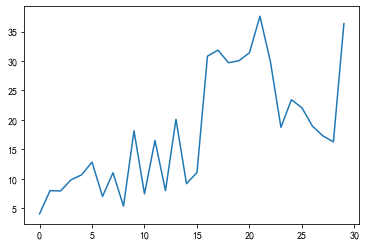

0      4.043333
1      7.996667
2      7.940000
3      9.830000
4     10.670000
5     12.836667
6      7.003333
7     11.036667
8      5.366667
9     18.146667
10     7.446667
11    16.506667
12     7.986667
13    20.116667
14     9.176667
15    11.070000
16    30.816667
17    31.846667
18    29.703333
19    30.043333
20    31.400000
21    37.593333
22    29.860000
23    18.736667
24    23.426667
25    22.053333
26    18.946667
27    17.286667
28    16.276667
29    36.346667
Name: edge_density, dtype: float64

In [21]:
plt.plot(res['edge_density'])
plt.show()
y1 = res['edge_density']
y1

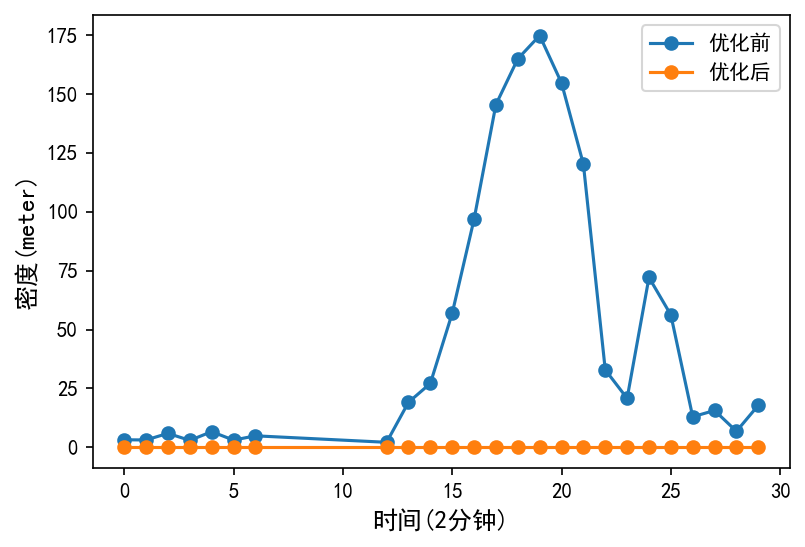

In [58]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

x = np.arange(res.shape[0])
y1 = res['edge_density']
y2 = res['edge_departed']

fig = plt.figure(dpi=150)
plt.plot(y1, label='优化前',marker = 'o')
plt.plot(y2, label='优化后',marker = 'o')
plt.xlabel('时间(2分钟)', fontsize=12)
plt.ylabel('密度(meter)', fontsize=12)

plt.legend()
plt.show()

In [ ]:
# plot the space for each vehicle

import matplotlib.colors as colors
data = []
fig = plt.figure(dpi=150)

t_min = np.min(data['Second0'])
t_max = np.max(data['Second0'])

v_plot_min = np.min(data['Speed (km/h)']) /3.6
v_plot_max = np.max(data['Speed (km/h)']) /3.6

dis0_max = np.max(data['CumDistance'])

for i in range(1, 6):
    veh = data.loc[data['Vehicle'] == i]

    x_axix = veh['Second0']
    y_axis = veh['CumDistance']

    norm = colors.Normalize(vmin=v_plot_min, vmax=v_plot_max)

    v = veh['Speed (km/h)'] /3.6
    plt.scatter(x_axix, y_axis, marker = '.', s=0.1, c=v, cmap='jet_r', norm= norm)


plt.xlabel('Time (second)', fontsize=12)
plt.ylabel('Space (meter)', fontsize=12)

plt.xlim(0, t_max)
plt.ylim(0, dis0_max)
plt.clim(v_plot_min, v_plot_max)
cbar = plt.colorbar()
cbar.set_label("speed(m/s)", fontsize=10)

plt.show()
fig.savefig('Space-time_figure.png', dpi=300, bbox_inches='tight')

In [110]:
titl = 'edge_density'.split(sep='_')[1]
titl.title()
titl

'density'

In [116]:
for pre, pos in edges.items():
    print(pre)
    print(pos)

huan
['331159366#1', '331159366#2', '331159366#3', '331159366#4', '331159366#5', '331159366#6', '331159366#7', '331159366#8']
dong
['331159364#2.1476', '331159364#2.526']
nan
['826105809#14', '826105809#14.186', '826105809#14.238']
xi
['331158296#2', '331158296#2.100', '331158296#2.118']
bei
['897570587', '897570587.118', '897570589']


In [119]:
lab_dict = dict(
                edge_density= "路段密度(辆/千米)",
                edge_laneDensity="车道密度(辆/千米/车道)", 
                edge_occupancy="占有率(%)",
                edge_timeLoss= "损失时间(秒)",
                edge_speed = "平均速度(米/秒)",
                edge_traveltime="通过时间(秒)",
                edge_waitingTime="停车排队时间(秒)"
                    )
"edge_density" in lab_dict.keys()

True

In [69]:
pre_dict= dict(
            huan="圆环",
            dong="东进口车道",
            xi="西进口车道",
            nan="南进口车道",
            bei="北进口车道"
                    )
                    

pre = "xi"
prefix = pre_dict[pre]
prefix

'西进口车道'

In [78]:
filename = 'edata_2min_agg_before.csv'


edges =dict(
        huan= ["331159366#1","331159366#2","331159366#3","331159366#4","331159366#5" ,"331159366#6","331159366#7","331159366#8"],
        dong = ["331159364#2.1476" , "331159364#2.526"],
        nan = ["826105809#14","826105809#14.186","826105809#14.238"],
        xi = ["331158296#2", "331158296#2.100", "331158296#2.118"],
        bei = ["897570587", "897570587.118", "897570589"]
        )
pos = edges['huan']

data= pd.read_csv(filename, sep=";")
tmp = data[data['edge_id'].isin(pos)]
tmp.reset_index(drop=True, inplace=True)

tmp.drop(labels=["interval_id","edge_id"], axis=1, inplace=True)
tmp = tmp.groupby(by=["interval_begin"]).mean()
res = tmp.reset_index() # 分组用的"interval_begin" 加进去了

idx = np.array(res["interval_begin"])/120
res.index = idx.astype(int)